In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Image 

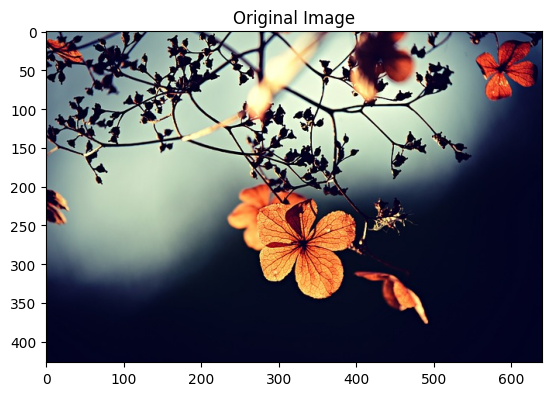

In [2]:
image = cv2.imread("Images/Flower.jpg")

plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Gaussian Noise

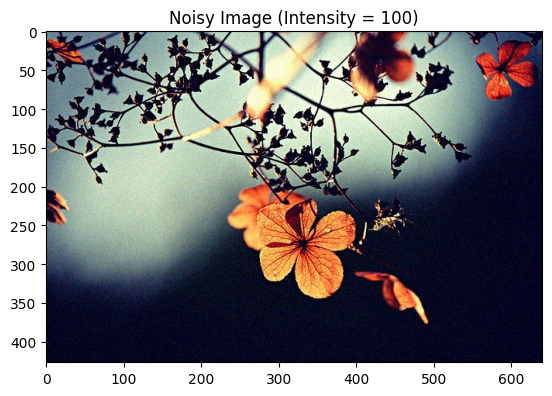

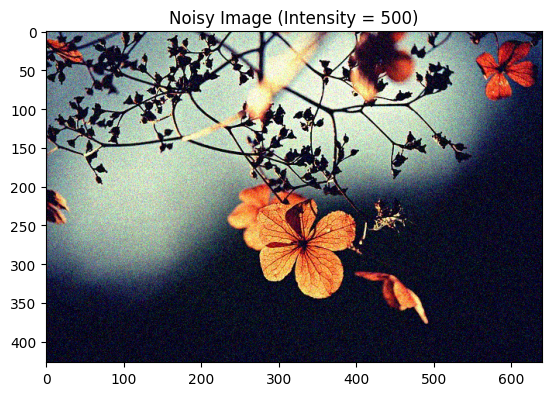

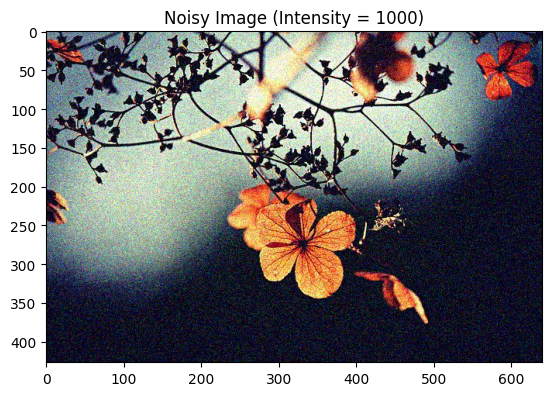

In [3]:
def gaussian_noise(image, intensity):
    noise = np.random.normal(0, intensity**0.5, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

image = cv2.imread("Images/Flower.jpg")

intensity = [100, 500, 1000]

for i in intensity:
    noisy_image = gaussian_noise(image, i)
    
    plt.title(f"Noisy Image (Intensity = {i})")
    plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
    plt.show()

### Gaussian Blur

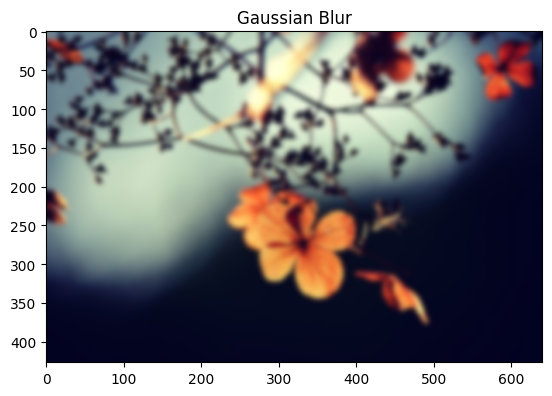

In [4]:
def gaussian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

gaussian_blur_image = gaussian_blur(image, 21)

plt.title("Gaussian Blur")
plt.imshow(cv2.cvtColor(gaussian_blur_image, cv2.COLOR_BGR2RGB))
plt.show()

### Motion Blur

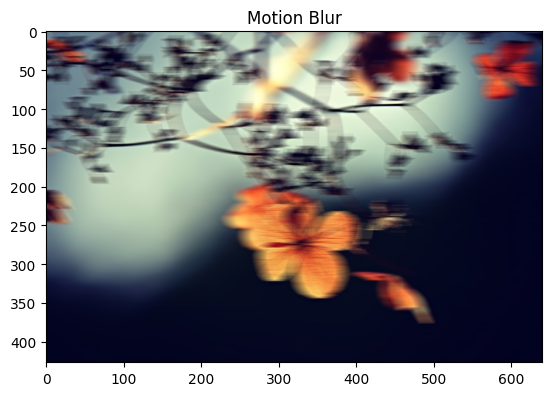

In [5]:
def motion_blur(image, kernel_size):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size-1)/2), :] = np.ones(kernel_size) # Horizontal Blur:
    kernel /= kernel_size
    return cv2.filter2D(image, -1, kernel)

motion_blur_image = motion_blur(image, 21)

plt.title("Motion Blur")
plt.imshow(cv2.cvtColor(motion_blur_image, cv2.COLOR_BGR2RGB))
plt.show()

### Defocus Blur

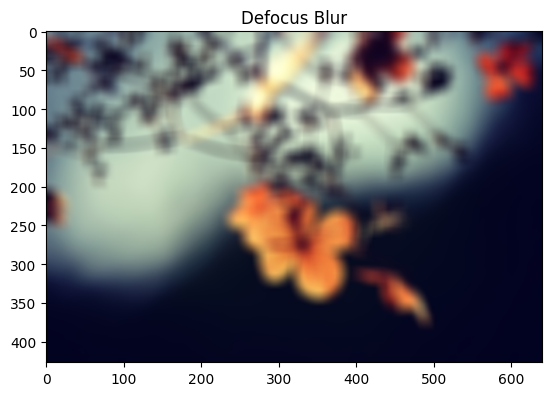

In [6]:
def defocus_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 10)

defocus_blur_image = defocus_blur(image, 21)

plt.title("Defocus Blur")
plt.imshow(cv2.cvtColor(defocus_blur_image, cv2.COLOR_BGR2RGB))
plt.show()

### Metrics

In [7]:
from lpips import LPIPS
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

import torch
from torchvision.transforms import ToTensor

def cal_metrics(image, noise_blur_image):
    
    psnr = peak_signal_noise_ratio(image, noise_blur_image) # PSNR - Higher PSNR indicates lower distortion
    
    # SSIM
    ssim_l = []
    for channel in range(3):
        ss, img = structural_similarity(image[:, :, channel], noise_blur_image[:, :, channel], full=True)
        ssim_l.append(ss)
    ssim = np.mean(ssim_l)
    
    # LPIPS - The lower the LPIPS value, the more perceptually similar the image are
    to_torch = ToTensor()
    image = to_torch(image).unsqueeze(0)
    noise_blur_image = to_torch(noise_blur_image).unsqueeze(0)
    
    lpips_m = LPIPS(net="alex", verbose=False)
    lpips_v = lpips_m(image, noise_blur_image).item()

    return psnr, ssim, lpips_v

image = cv2.imread("Images/Flower.jpg")
images = {"Gaussian Noise : 100" : gaussian_noise(image, 100),
          "Gaussian Noise : 500" : gaussian_noise(image, 500),
          "Gaussian Noise : 1000" : gaussian_noise(image, 1000),
          "Gaussian Blur" : gaussian_blur(image, 21),
          "Motion Blur" : motion_blur(image, 21),
          "Defocus Blur" : defocus_blur(image, 21)}

report = pd.DataFrame(index=[["PSNR", "SSIM", "LPIPS"]])

for img in images:
    metric = cal_metrics(image, images[img])
    report[img] = metric
    
print(report.T)

                            PSNR      SSIM     LPIPS
Gaussian Noise : 100   28.770521  0.624925  0.168460
Gaussian Noise : 500   22.099129  0.382049  0.354337
Gaussian Noise : 1000  19.314475  0.308441  0.460528
Gaussian Blur          18.135528  0.719930  0.435534
Motion Blur            17.329836  0.701168  0.362760
Defocus Blur           16.334761  0.638582  0.539649
